In [1]:
from sklearn.datasets import fetch_openml


In [2]:
mnist=fetch_openml('mnist_784')


In [3]:
x,y=mnist['data'],mnist['target']

In [4]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [5]:
a_digit=x[34216]
a_digit_image=a_digit.reshape(28,28)

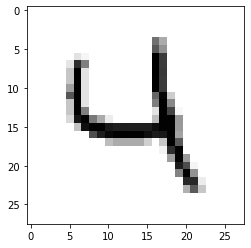

In [6]:
plt.imshow(a_digit_image,cmap=matplotlib.cm.binary,interpolation="nearest")

In [7]:
x_train,x_test=x[:60000],x[60000:]
y_train,y_test=y[:60000],y[60000:]



# Creating a 4 detector

In [8]:
import numpy as np
y_train=y_train.astype(np.int8)
y_test=y_train.astype(np.int8)
y_train_4=(y_train==4)
y_test_4=(y_test==4)

In [9]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=int8)

In [10]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
clf.fit(x_train,y_train_4)


C:\Users\rajdeep kalita\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [11]:
clf.predict([a_digit])

array([ True])

In [12]:
from sklearn.model_selection import cross_val_score
a=cross_val_score(clf,x_train,y_train_4,cv=3,scoring="accuracy")


C:\Users\rajdeep kalita\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\rajdeep kalita\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

In [13]:
a.mean()

0.9813

In [14]:
from sklearn.model_selection import cross_val_predict
y_train_pred=cross_val_predict(clf,x_train,y_train_4,cv=3)


C:\Users\rajdeep kalita\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\rajdeep kalita\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

In [16]:
y_train_pred

array([False, False,  True, ..., False, False, False])

In [17]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_4,y_train_pred)

array([[53614,   544],
       [  578,  5264]], dtype=int64)

# Precision,Recall and F1-score

In [21]:
from sklearn.metrics import precision_score,recall_score,f1_score
precision_score(y_train_4,y_train_pred)

0.90633608815427

In [22]:
recall_score(y_train_4,y_train_pred)

0.9010612803834304

In [23]:
f1_score(y_train_4,y_train_pred)

0.9036909871244637